# Multi linear Regresson Predection

### About Project:
This project in focused on Multi linear Regresson Predection using different methods
### About Data:
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#### 2.Importing the table

In [5]:
df=pd.read_csv("insurance.csv")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
-----------------------------------------------------------------------------------------------
Columns names
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


#### 3.Describing data

In [6]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
-----------------------------------------------------------------------------------------------
Number of rows and columns
(1338, 7)
-----------------------------------------------------------------------------------------------
data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 no

#### 4.Checking for Nulldata

In [7]:
print("Data percentaile")
print(df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("-----------------------------------------------------------------------------------------------")
print("Checking for null")
print(df.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
1%       18.000000    17.895150     0.000000   1252.972730
2%       18.000000    19.271400     0.000000   1621.741650
3%       18.000000    19.960450     0.000000   1636.154889
4%       18.000000    20.520000     0.000000   1709.934254
5%       18.000000    21.256000     0.000000   1757.753400
6%       19.000000    21.660000     0.000000   1907.055474
7%       19.000000    21.873600     0.000000   2020.398427
8%       19.000000    22.300000     0.000000   2138.054016
9%       19.000000    22.610000     0.000000   2208.830439
10%      19.000000    22.990000     0.000000   2346.533615
20%      24.000000    25.326000     0.000000   3991.575720
30%      29.000000    27.360000     0.0

#### 5.Changeing the Datatypes

In [8]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
print(df.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
print(df.dtypes)

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object


#### 6.Finding the outlayers and reworking with the Median(Using pandas bond method)

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.000000
sex             1.000000
bmi             8.397500
children        2.000000
smoker          0.000000
region          1.000000
charges     11899.625365
dtype: float64


In [11]:
print(((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).head(3))

     age    sex    bmi  children  smoker  region  charges
0  False  False  False     False    True   False    False
1  False  False  False     False   False   False    False
2  False  False  False     False   False   False    False


In [12]:
median=(df['charges'].quantile(0.50)) 
Max=(df['charges'].quantile(0.95)) 
df['charges'] = np.where(df['charges'] > Max, median, df['charges'])

median=(df['charges'].quantile(0.50)) 
Min=(df['charges'].quantile(0.1)) 
df['charges'] = np.where(df['charges'] < Min, median, df['charges'])
print(df.describe())
print(df.shape)

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  12166.938919  
std       1.104885   8821.139504  
min       0.000000   2352.968450  
25%       1.000000   6549.083813  
50%       2.000000   9381.000925  
75%       2.000000  13764.541512  
max       3.000000  41097.161750  
(1338, 7)


## Visualizeing and Analysing the Data

#### 1.Visualizing data

##### 1.1 Depicts the variation in the data distribution

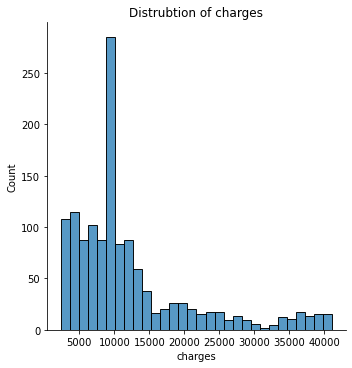

-----------------------------------------------------------------------------------------------


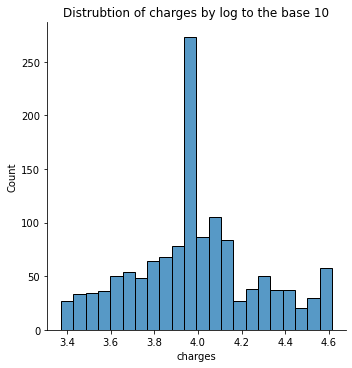

In [13]:
sns.displot(data=df,x="charges")
plt.title("Distrubtion of charges")
plt.show()
print("-----------------------------------------------------------------------------------------------")
sns.displot(np.log10(df["charges"]))
plt.title("Distrubtion of charges by log to the base 10")
plt.show()

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

##### 1.2 Presenting categorical data with rectangular bars proportional to the values that they represent

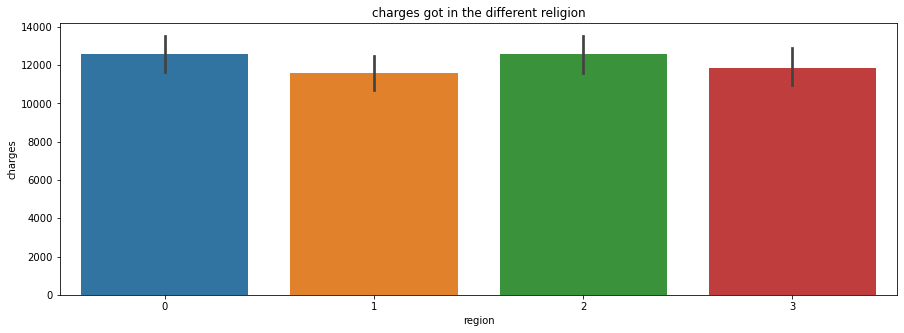

----------------------------------------------------------------------------------------------------------


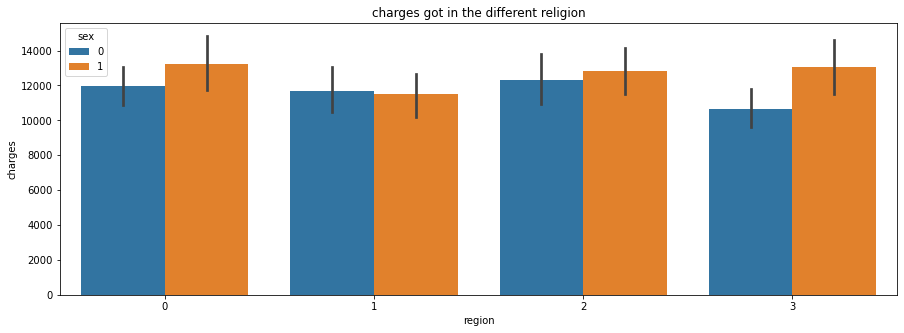

----------------------------------------------------------------------------------------------------------


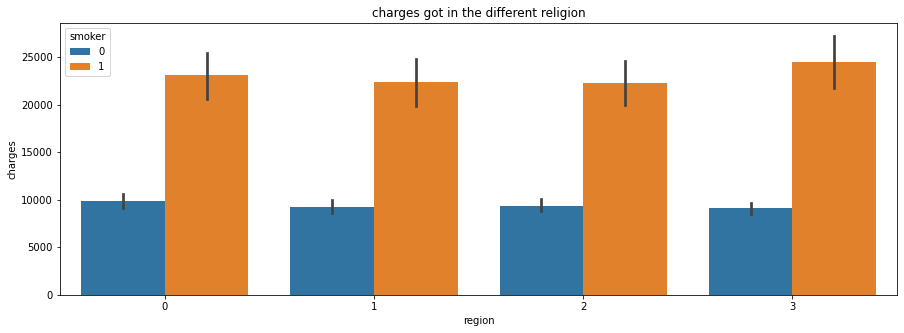

----------------------------------------------------------------------------------------------------------


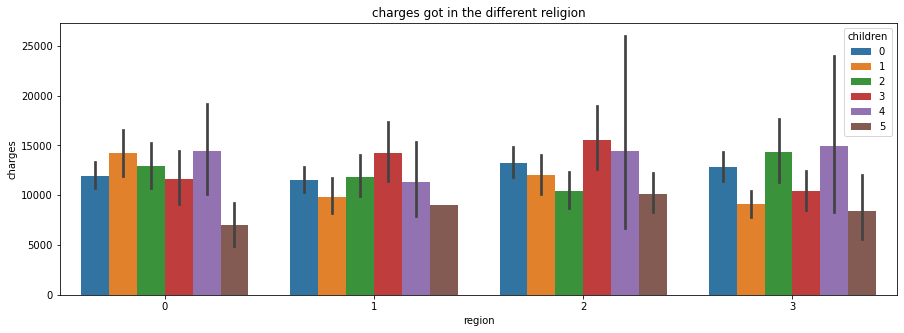

In [14]:
plt.figure(figsize=[15,5])
sns.barplot(data=df,x="region",y="charges")
plt.title("charges got in the different religion")
plt.show()
print("----------------------------------------------------------------------------------------------------------")
plt.figure(figsize=[15,5])
sns.barplot(data=df,x="region",y="charges",hue="sex")
plt.title("charges got in the different religion")
plt.show()
print("----------------------------------------------------------------------------------------------------------")
plt.figure(figsize=[15,5])
sns.barplot(data=df,x="region",y="charges",hue="smoker")
plt.title("charges got in the different religion")
plt.show()
print("----------------------------------------------------------------------------------------------------------")
plt.figure(figsize=[15,5])
sns.barplot(data=df,x="region",y="charges",hue="children")
plt.title("charges got in the different religion")
plt.show()

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

##### 1.3 Drawing a scatter plot onto a FacetGrid

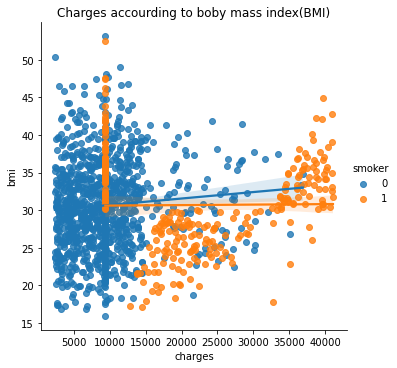

----------------------------------------------------------------------------------------------------------


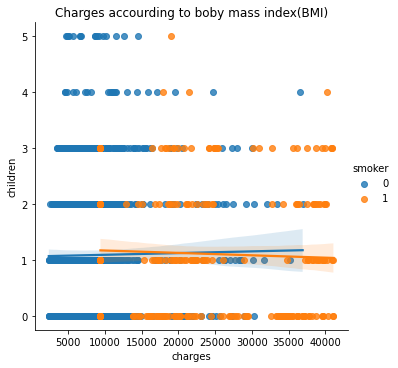

----------------------------------------------------------------------------------------------------------


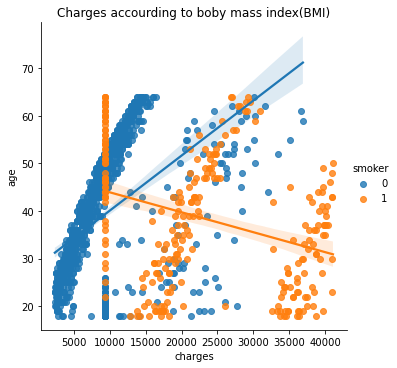

In [15]:
sns.lmplot(data=df,x="charges",y="bmi",hue="smoker")
plt.title("Charges accourding to boby mass index(BMI)")
plt.show()
print("----------------------------------------------------------------------------------------------------------")
sns.lmplot(data=df,x="charges",y="children",hue="smoker")
plt.title("Charges accourding to boby mass index(BMI)")
plt.show()
print("----------------------------------------------------------------------------------------------------------")
sns.lmplot(data=df,x="charges",y="age",hue="smoker")
plt.title("Charges accourding to boby mass index(BMI)")
plt.show()

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

##### 1.4 Visualizeing the strength of relationships between numerical variables.

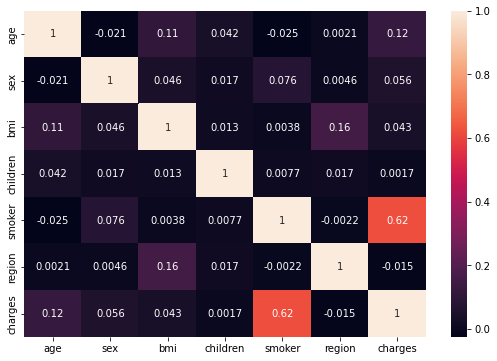

In [16]:
plt.figure(figsize=[9,6])
corr=df.corr()
sns.heatmap(data=corr,annot=True)
plt.show()

#### 2.Spliting my dependent (y) and indipendent feature (x)

In [17]:
x=df.drop(["charges"],axis=1)
y=df.loc[:,("charges")]
y=pd.DataFrame(y)
print("INDIPENDENT VARIABLE (x)")
print(x)
print("----------------------------------------------------------------------------------------------------------")
print("DIPENDENT VARIABLE (y)")
print(y)

INDIPENDENT VARIABLE (x)
      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
----------------------------------------------------------------------------------------------------------
DIPENDENT VARIABLE (y)
          charges
0     16884.92400
1      9379.96885
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   9379.96885
1335   9379.96885
1336   9379.96885
1337  29141.36030

[1338 rows x 1 

#### 3.Spliting the Data for training as 80% and testing as 20%

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      age  sex     bmi  children  smoker  region
621    37    1  34.100         4       1       3
194    18    1  34.430         0       0       2
240    23    0  36.670         2       1       0
1168   32    1  35.200         2       0       3
1192   58    0  32.395         1       0       0
...   ...  ...     ...       ...     ...     ...
763    27    1  26.030         0       0       0
835    42    1  35.970         2       0       2
1216   40    1  25.080         0       0       2
559    19    1  35.530         0       0       1
684    33    0  18.500         1       0       3

[1070 rows x 6 columns]
      age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1
...   ...  ...     ...       ...     ...     ...
1084   62    0  30.495         2       0    

## Working on Regression

#### 1.LInear Regression

In [19]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_pred=lin_reg.predict(x_test)
print(lin_reg.coef_)

[[   92.20577807   326.62612326    42.69456098   -52.22673168
  13778.72270588   -89.44021555]]


#### 2.Ridge Regression

In [20]:
ridge = Ridge()
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
print(ridge.coef_)

[[   92.08922322   328.60883905    42.63024853   -51.41653883
  13699.60539024   -90.1218026 ]]


#### 3.Lasso Regression

In [21]:
lassco=Lasso()
lassco.fit(x_train,y_train)
lassco_pred=lassco.predict(x_test)
print(ridge.coef_)

[[   92.08922322   328.60883905    42.63024853   -51.41653883
  13699.60539024   -90.1218026 ]]


#### 4.Polynomial Regression

##### 4.1 Preparing data for Polynomial regression

In [22]:
xp=df.drop(['sex','smoker','region','charges'],axis=1)
yp=y
poly=PolynomialFeatures(degree=4)
x_pol=poly.fit_transform(xp)
xp_train,xp_test,yp_train,yp_test=train_test_split(x_pol,yp,test_size=0.2,random_state=0)
xp_train=pd.DataFrame(xp_train)
xp_test=pd.DataFrame(xp_test)
print(xp_train)
print(xp_test)
print(yp_train)
print(yp_test)

       0     1       2    3       4        5      6            7        8   \
0     1.0  37.0  34.100  4.0  1369.0  1261.70  148.0  1162.810000  136.400   
1     1.0  18.0  34.430  0.0   324.0   619.74    0.0  1185.424900    0.000   
2     1.0  23.0  36.670  2.0   529.0   843.41   46.0  1344.688900   73.340   
3     1.0  32.0  35.200  2.0  1024.0  1126.40   64.0  1239.040000   70.400   
4     1.0  58.0  32.395  1.0  3364.0  1878.91   58.0  1049.436025   32.395   
...   ...   ...     ...  ...     ...      ...    ...          ...      ...   
1065  1.0  27.0  26.030  0.0   729.0   702.81    0.0   677.560900    0.000   
1066  1.0  42.0  35.970  2.0  1764.0  1510.74   84.0  1293.840900   71.940   
1067  1.0  40.0  25.080  0.0  1600.0  1003.20    0.0   629.006400    0.000   
1068  1.0  19.0  35.530  0.0   361.0   675.07    0.0  1262.380900    0.000   
1069  1.0  33.0  18.500  1.0  1089.0   610.50   33.0   342.250000   18.500   

        9   ...       25            26            27        28 

##### 4.2 Executing the Polynomial Regression

In [23]:
poly_reg=LinearRegression()
poly_reg.fit(xp_train,yp_train)
poly_pred=poly_reg.predict(xp_test)
print(poly_reg.coef_)

[[ 4.62384414e-06 -9.49546672e+03 -1.52773781e+04 -4.86313398e+02
   2.26514873e+02  3.91778943e+02  8.18463749e+02  5.67574481e+02
  -1.95501007e+03  8.61786475e+03 -3.09195047e+00 -2.43196568e+00
   1.00678263e+00 -1.03762869e+01 -4.32252532e+01 -1.21631163e+02
  -8.29437780e+00  1.04226392e+02 -2.87350198e+02 -3.04156078e+02
   1.61406281e-02  1.24420370e-02 -1.97170584e-02  1.88104372e-02
   5.21956588e-02 -1.41334216e-01  9.20954107e-02  4.49953919e-01
   3.65731863e+00  4.74737684e+00  3.86480131e-02 -1.24355931e+00
  -6.08093068e-01  2.47840569e+01 -8.59842583e+01]]


## Regression Results

#### 1.Training and Test score

In [24]:
print("Train score for linear Regression",lin_reg.score(x_train,y_train))
print("Test score for linear Regression",lin_reg.score(x_test,y_test))
print("----------------------------------------------------------------------------------------------------------")
print("Train score for ridge Regression",ridge.score(x_train,y_train))
print("Test score for ridge Regression",ridge.score(x_test,y_test))
print("----------------------------------------------------------------------------------------------------------")
print("Train score for lassco Regression",lassco.score(x_train,y_train))
print("Test score for lassco Regression",lassco.score(x_test,y_test))
print("----------------------------------------------------------------------------------------------------------")
print("Train score for polynomial Regression",poly_reg.score(xp_train,yp_train))
print("Test score for polynomial Regression",poly_reg.score(xp_test,yp_test))
print("----------------------------------------------------------------------------------------------------------")

Train score for linear Regression 0.40950373514881777
Test score for linear Regression 0.38426205037159133
----------------------------------------------------------------------------------------------------------
Train score for ridge Regression 0.4094908079381291
Test score for ridge Regression 0.3845516642376968
----------------------------------------------------------------------------------------------------------
Train score for lassco Regression 0.40950359047971985
Test score for lassco Regression 0.38429823930051565
----------------------------------------------------------------------------------------------------------
Train score for polynomial Regression 0.08431022676609123
Test score for polynomial Regression 0.018459693359854534
----------------------------------------------------------------------------------------------------------


#### 2.Forming table for all predection value

In [25]:
print(y_test)
print(lin_pred)
print(ridge_pred)
print(lassco_pred)
print(poly_pred)

          charges
578    9724.53000
610    8547.69130
569    9382.03300
1034  12950.07120
198    9644.25250
...           ...
1084  15019.76005
726    6664.68595
1132  20709.02034
725   40932.42950
963    9500.57305

[268 rows x 1 columns]
[[10627.77518867]
 [ 9894.12390497]
 [24606.85760622]
 [12037.97586291]
 [ 9921.3115342 ]
 [ 8911.83906101]
 [ 7320.83161981]
 [10547.43611473]
 [ 9085.12208572]
 [ 8802.81161211]
 [ 8327.13316039]
 [10073.46685597]
 [ 9458.48869445]
 [ 8439.43526506]
 [22259.87985181]
 [10014.62735705]
 [11345.48455746]
 [ 8596.51615003]
 [ 9423.41510773]
 [21797.16723658]
 [24210.18171379]
 [10951.18018786]
 [10650.51527238]
 [23659.32371862]
 [ 8155.68837638]
 [ 9356.60596642]
 [ 7857.57098771]
 [ 9299.21125146]
 [ 8316.07693111]
 [10121.58333706]
 [ 9204.63790918]
 [25608.45705372]
 [11909.46054013]
 [11259.75063752]
 [21405.37401325]
 [ 8496.25267268]
 [10452.0296551 ]
 [22458.26549885]
 [23209.99462834]
 [ 7535.14403776]
 [ 8704.72876121]
 [ 8552.21953238]
 [23

In [26]:
y_test1=np.array(y_test)
Actual=pd.DataFrame(y_test1)
Actual.columns=["Actual"]

linear_predection=pd.DataFrame(lin_pred)
linear_predection.columns=["linear_predection"]

ridge_prediction=pd.DataFrame(ridge_pred)
ridge_prediction.columns=["ridge_predection"]

lassco_predecton=pd.DataFrame(lassco_pred)
lassco_predecton.columns=["lassco_predection"]

polynomial_predection=pd.DataFrame(poly_pred)
polynomial_predection.columns=["polynomial_Regression"]

In [27]:
ps=pd.DataFrame()
ps["Actual"]=Actual.Actual
ps["linear_predection"]=linear_predection.linear_predection
ps["ridge_prediction"]=ridge_prediction.ridge_predection
ps["lassco_predecton"]=lassco_predecton.lassco_predection
ps["polynomial_Regression"]=polynomial_predection.polynomial_Regression

In [28]:
print(ps.head())

       Actual  linear_predection  ridge_prediction  lassco_predecton  \
0   9724.5300       10627.775189      10642.452894      10627.910271   
1   8547.6913        9894.123905       9908.136635       9897.419276   
2   9382.0330       24606.857606      24544.390983      24599.920846   
3  12950.0712       12037.975863      12051.631479      12035.342626   
4   9644.2525        9921.311534       9935.457456       9923.488157   

   polynomial_Regression  
0           13424.717762  
1           12726.859641  
2           11005.449950  
3           11852.219371  
4           11097.820786  


#### 3.Finding the Errors

In [29]:
print('Linear Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_pred))
print('Linear Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred))
print('Linear Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))
print("----------------------------------------------------------------------------------------------------------")
print('Ridge Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_pred))
print('Ridge Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred))
print('Ridge Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("----------------------------------------------------------------------------------------------------------")
print('Lassco Mean Absolute Error:', metrics.mean_absolute_error(y_test, lassco_pred))
print('Lassco Mean Squared Error:', metrics.mean_squared_error(y_test, lassco_pred))
print('Lassco Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lassco_pred)))
print("----------------------------------------------------------------------------------------------------------")
print('Polynomial Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))
print('Polynomial Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))
print('Polynomial Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred)))

Linear Mean Absolute Error: 4673.248029575982
Linear Mean Squared Error: 46440675.32013531
Linear Root Mean Squared Error: 6814.739563632297
----------------------------------------------------------------------------------------------------------
Ridge Mean Absolute Error: 4672.979757955759
Ridge Mean Squared Error: 46418831.83374287
Ridge Root Mean Squared Error: 6813.136710337088
----------------------------------------------------------------------------------------------------------
Lassco Mean Absolute Error: 4673.191095044942
Lassco Mean Squared Error: 46437945.85007524
Lassco Root Mean Squared Error: 6814.539298446758
----------------------------------------------------------------------------------------------------------
Polynomial Mean Absolute Error: 6481.004614838083
Polynomial Mean Squared Error: 74030510.41731331
Polynomial Root Mean Squared Error: 8604.09846627253


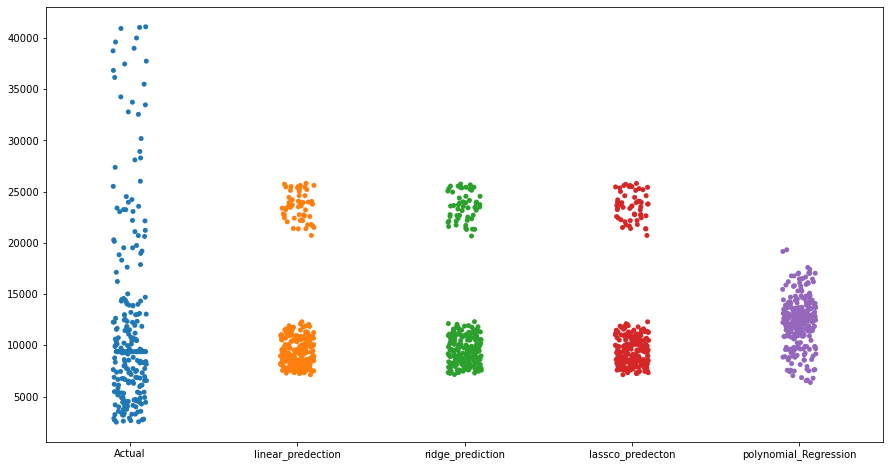

In [30]:
plt.figure(figsize=[15,8])
sns.stripplot(data=ps)
plt.show()